In [1]:
from IPython.display import clear_output
import torch
from my_snn.rsnn import *
from my_snn.rsnn_delays import RSNN_d_d,RSNN_d_d_ALIF 
from my_snn.utils import train, training_plots, ModelLoader
from my_snn.tonic_dataloader import DatasetLoader
import matplotlib.pyplot as plt 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print ('Running on: {}'.format(device))

Running on: cuda:0


## SHD250

In [5]:
dataset = 'shd'
time_window = 250
batch_size = 256 # lr=1e-4
#batch_size = 128 # lr=1e-4
DL = DatasetLoader(dataset=dataset, caching='memory', num_workers=0, batch_size=batch_size, time_window=time_window)
data = DL.get_dataloaders()
ckpt_dir = 'other-tests250'

## Old configuration: 88.67%

In [3]:
hidden = (64, 2, 'f')
snn = RSNN_d_d(dataset, hidden=hidden, delay =(150,3), thresh=0.3, tau_m='adp', win=time_window, surr='step',  loss_fn ='sum', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-4, 50, ckpt_dir=ckpt_dir, lr_scale = (1.0, 1.0)) # old configuration

delays: [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147]
RSNN_d_d(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=700, out_features=64, bias=False)
  (f1_f2): Linear(in_features=3200, out_features=64, bias=False)
  (f2_o): Linear(in_features=3200, out_features=20, bias=False)
)
Total params: 313600
Total mult-adds (M): 78.4
training shd250_RSNN_d_d_2l64_150d3.t7 for 50 epochs...
Epoch [1/50]
Time elasped: 79.80305051803589
Epoch [2/50]
Time elasped: 42.52282977104187
Epoch [3/50]
Time elasped: 42.15199851989746
Epoch [4/50]
Time elasped: 41.66799783706665
Epoch [5/50]
Time elasped: 41.81245136260986
Test Loss: 0.2805635367476498
Avg spk_count per neuron for all 250 timesteps 32.86103057861328
Test Accuracy of the model on the test samples: 75.098
Saving max acc model
Epoch [6/50]
Time elasped: 41.84663248062134
Epoch 

shd250_RSNN_d_d_2l64_150d3.t7 max acc: 88.671875


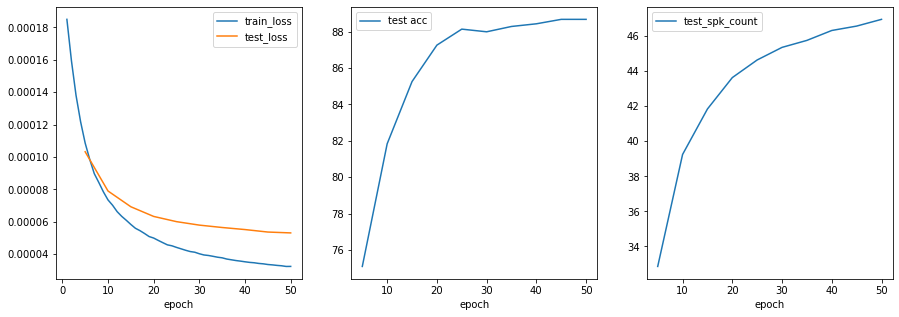

In [4]:
training_plots(snn, figsize = (15,5))

## Separate lr (88.3%)

In [6]:
hidden = (64, 2, 'f')
snn = RSNN_d_d(dataset, hidden=hidden, delay =(150,3), thresh=0.3, tau_m='adp', win=time_window, surr='step',  loss_fn ='sum', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-4, 50, ckpt_dir=ckpt_dir) # old configuration

delays: [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147]
RSNN_d_d(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=700, out_features=64, bias=False)
  (f1_f2): Linear(in_features=3200, out_features=64, bias=False)
  (f2_o): Linear(in_features=3200, out_features=20, bias=False)
)
Total params: 313600
Total mult-adds (M): 78.4
training shd250_RSNN_d_d_2l64_150d3.t7 for 50 epochs...
Epoch [1/50]
Time elasped: 40.97015070915222
Epoch [2/50]
Time elasped: 41.575634241104126
Epoch [3/50]
Time elasped: 42.01372790336609
Epoch [4/50]
Time elasped: 41.065014123916626
Epoch [5/50]
Time elasped: 40.452359199523926
Test Loss: 0.29196640914233285
Avg spk_count per neuron for all 250 timesteps 30.534061431884766
Test Accuracy of the model on the test samples: 73.779
Saving max acc model
Epoch [6/50]
Time elasped: 40.809391498565674


shd250_RSNN_d_d_2l64_150d3.t7 max acc: 88.330078125


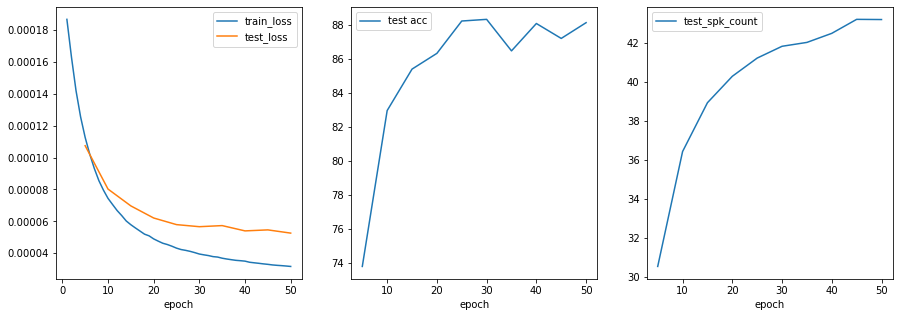

In [7]:
training_plots(snn, figsize = (15,5))

## Delay + mg-mot

In [8]:
hidden = (64, 2, 'f')
snn = RSNN_d_d(dataset, hidden=hidden, delay =(150,3), thresh=0.3, tau_m='adp', win=time_window, surr='mg',  loss_fn ='mot', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-4, 50, ckpt_dir=ckpt_dir)

delays: [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147]
RSNN_d_d(
  (criterion): CrossEntropyLoss()
  (f0_i): Linear(in_features=700, out_features=64, bias=False)
  (f1_f2): Linear(in_features=3200, out_features=64, bias=False)
  (f2_o): Linear(in_features=3200, out_features=20, bias=False)
)
Total params: 313600
Total mult-adds (M): 78.4
training shd250_RSNN_d_d_2l64_150d3.t7 for 50 epochs...
Epoch [1/50]
Time elasped: 42.79894161224365
Epoch [2/50]
Time elasped: 42.57522392272949
Epoch [3/50]
Time elasped: 42.37284874916077
Epoch [4/50]
Time elasped: 42.33125305175781
Epoch [5/50]
Time elasped: 42.28269028663635
Test Loss: 5.994991124297182
Avg spk_count per neuron for all 250 timesteps 23.993587493896484
Test Accuracy of the model on the test samples: 79.834
Saving max acc model
Epoch [6/50]
Time elasped: 42.631670713424

shd250_RSNN_d_d_2l64_150d3.t7 max acc: 86.62109375


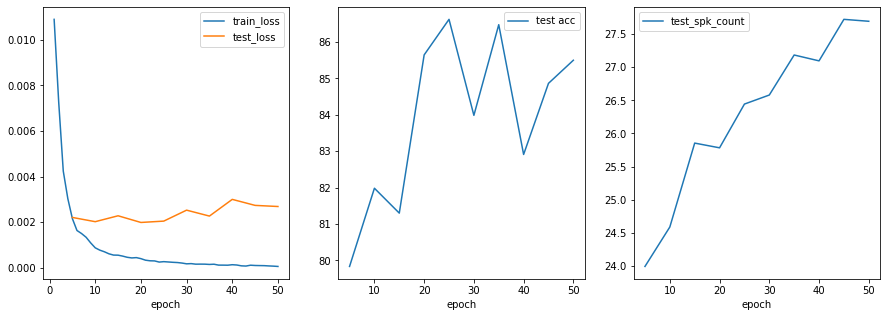

In [9]:
training_plots(snn, figsize = (15,5))

## Bojian's Alif (76,8%)

In [8]:
num_hidden = 128
snn = RSNN_2l_ALIF(dataset, num_hidden=num_hidden, thresh=0.3, tau_m='adp', win=time_window, surr='mg', loss_fn ='mot', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-2, 50, ckpt_dir=ckpt_dir) # old configuration

RSNN_2l_ALIF(
  (criterion): CrossEntropyLoss()
  (fc_ih): Linear(in_features=700, out_features=128, bias=False)
  (fc_h1h1): Linear(in_features=128, out_features=128, bias=False)
  (fc_h1h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_h2h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_ho): Linear(in_features=128, out_features=20, bias=False)
)
Total params: 141312
Total mult-adds (M): 35.328
training shd250_RSNN_2l_ALIF_128.t7 for 50 epochs...
Epoch [1/50]
Time elasped: 35.652042627334595
Epoch [2/50]
Time elasped: 35.23992609977722
Epoch [3/50]
Time elasped: 35.407368421554565
Epoch [4/50]
Time elasped: 35.16301393508911
Epoch [5/50]
Time elasped: 35.531275510787964
Test Loss: 9.55063154148714
Avg spk_count per neuron for all 250 timesteps 15.73440170288086
Test Accuracy of the model on the test samples: 70.752
Saving max acc model
Epoch [6/50]
Time elasped: 35.181771993637085
Epoch [7/50]
Time elasped: 35.33574938774109
Epoch [8/50]
Time elasped: 35.

shd250_RSNN_2l_ALIF_128.t7 max acc: 76.806640625


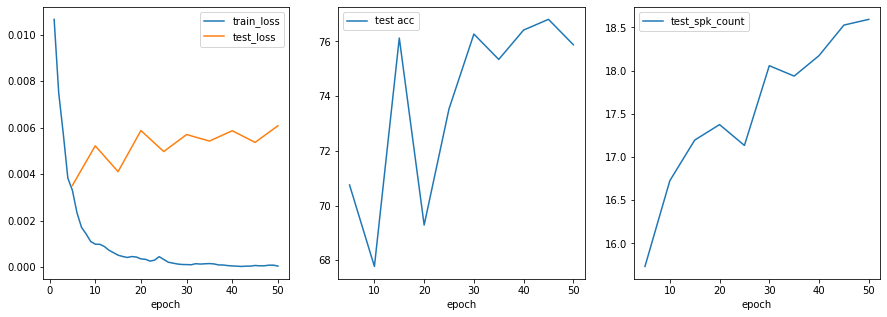

In [9]:
training_plots(snn, figsize = (15,5))

## Bojian's Alif (smaller lr) 63,5%

In [10]:
num_hidden = 128
snn = RSNN_2l_ALIF(dataset, num_hidden=num_hidden, thresh=0.3, tau_m='adp', win=time_window, surr='mg', loss_fn ='mot', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-3, 50, ckpt_dir=ckpt_dir) # old configuration

RSNN_2l_ALIF(
  (criterion): CrossEntropyLoss()
  (fc_ih): Linear(in_features=700, out_features=128, bias=False)
  (fc_h1h1): Linear(in_features=128, out_features=128, bias=False)
  (fc_h1h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_h2h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_ho): Linear(in_features=128, out_features=20, bias=False)
)
Total params: 141312
Total mult-adds (M): 35.328
training shd250_RSNN_2l_ALIF_128.t7 for 50 epochs...
Epoch [1/50]
Time elasped: 33.46034860610962
Epoch [2/50]
Time elasped: 33.12640690803528
Epoch [3/50]
Time elasped: 33.06206512451172
Epoch [4/50]
Time elasped: 33.26018285751343
Epoch [5/50]
Time elasped: 33.320852518081665
Test Loss: 18.330914788413793
Avg spk_count per neuron for all 250 timesteps 15.804586410522461
Test Accuracy of the model on the test samples: 42.578
Saving max acc model
Epoch [6/50]
Time elasped: 35.100669860839844
Epoch [7/50]
Time elasped: 34.989898443222046
Epoch [8/50]
Time elasped: 3

shd250_RSNN_2l_ALIF_128.t7 max acc: 63.57421875


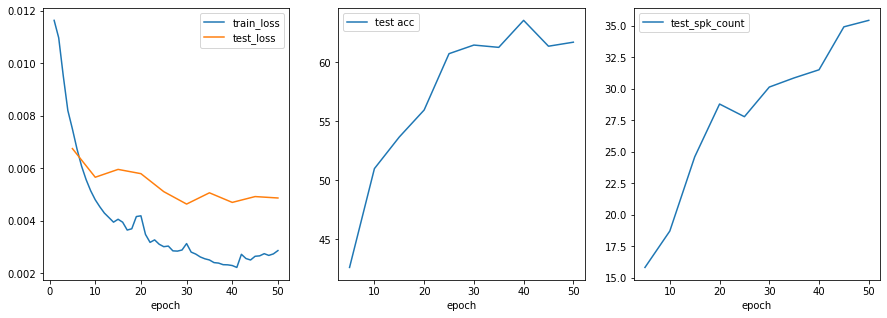

In [11]:
training_plots(snn, figsize = (15,5))

## Bojian's Alif (smaller lr) 75,8%

In [ ]:
num_hidden = 128
snn = RSNN_2l_ALIF(dataset, num_hidden=num_hidden, thresh=0.3, tau_m='adp', win=time_window, surr='mg', loss_fn ='mot', batch_size=256, device=device)
snn.to(device)
train(snn, data, 5e-3, 50, ckpt_dir=ckpt_dir) # old configuration

In [13]:
train(snn, data, 5e-3, 50, ckpt_dir=ckpt_dir) # old configuration

RSNN_2l_ALIF(
  (criterion): CrossEntropyLoss()
  (fc_ih): Linear(in_features=700, out_features=128, bias=False)
  (fc_h1h1): Linear(in_features=128, out_features=128, bias=False)
  (fc_h1h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_h2h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_ho): Linear(in_features=128, out_features=20, bias=False)
)
Total params: 141312
Total mult-adds (M): 35.328
training shd250_RSNN_2l_ALIF_128.t7 for 50 epochs...
Epoch [1/50]
Time elasped: 36.034339427948
Epoch [2/50]
Time elasped: 35.24140429496765
Epoch [3/50]
Time elasped: 34.58434820175171
Epoch [4/50]
Time elasped: 34.86970567703247
Epoch [5/50]
Time elasped: 34.69838309288025
Test Loss: 13.6991529505079
Avg spk_count per neuron for all 250 timesteps 33.727867126464844
Test Accuracy of the model on the test samples: 62.891
Saving max acc model
Epoch [6/50]
Time elasped: 35.06176972389221
Epoch [7/50]
Time elasped: 34.839133501052856
Epoch [8/50]
Time elasped: 35.0182

shd250_RSNN_2l_ALIF_128.t7 max acc: 75.830078125


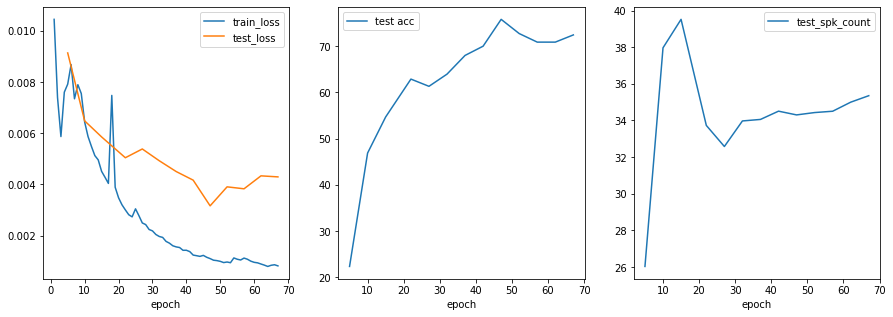

In [14]:
training_plots(snn, figsize = (15,5))

In [16]:
num_hidden = 128
snn = RSNN_2l_ALIF(dataset, num_hidden=num_hidden, thresh=0.1, tau_m='adp', win=time_window, surr='mg', loss_fn ='mot', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-2, 5, ckpt_dir=ckpt_dir) # old configuration

RSNN_2l_ALIF(
  (criterion): CrossEntropyLoss()
  (fc_ih): Linear(in_features=700, out_features=128, bias=False)
  (fc_h1h1): Linear(in_features=128, out_features=128, bias=False)
  (fc_h1h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_h2h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_ho): Linear(in_features=128, out_features=20, bias=False)
)
Total params: 141312
Total mult-adds (M): 35.328
training shd250_RSNN_2l_ALIF_128.t7 for 5 epochs...
Epoch [1/5]
Time elasped: 35.07843852043152
Epoch [2/5]
Time elasped: 34.687437772750854
Epoch [3/5]
Time elasped: 34.44109082221985
Epoch [4/5]
Time elasped: 34.60364007949829
Epoch [5/5]
Time elasped: 34.85117816925049
Test Loss: 19.148286879605923
Avg spk_count per neuron for all 250 timesteps 21.248186111450195
Test Accuracy of the model on the test samples: 38.672
Saving max acc model


In [17]:
num_hidden = 128
snn = RSNN_2l_ALIF(dataset, num_hidden=num_hidden, thresh=0.4, tau_m='adp', win=time_window, surr='mg', loss_fn ='mot', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-2, 5, ckpt_dir=ckpt_dir) # old configuration

RSNN_2l_ALIF(
  (criterion): CrossEntropyLoss()
  (fc_ih): Linear(in_features=700, out_features=128, bias=False)
  (fc_h1h1): Linear(in_features=128, out_features=128, bias=False)
  (fc_h1h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_h2h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_ho): Linear(in_features=128, out_features=20, bias=False)
)
Total params: 141312
Total mult-adds (M): 35.328
training shd250_RSNN_2l_ALIF_128.t7 for 5 epochs...
Epoch [1/5]
Time elasped: 34.54527282714844
Epoch [2/5]
Time elasped: 34.578330516815186
Epoch [3/5]
Time elasped: 34.50356459617615
Epoch [4/5]
Time elasped: 34.65151309967041
Epoch [5/5]
Time elasped: 35.03009009361267
Test Loss: 14.076949849414328
Avg spk_count per neuron for all 250 timesteps 11.054475784301758
Test Accuracy of the model on the test samples: 62.061
Saving max acc model


In [18]:
num_hidden = 128
snn = RSNN_2l_ALIF(dataset, num_hidden=num_hidden, thresh=0.5, tau_m='adp', win=time_window, surr='mg', loss_fn ='mot', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-2, 5, ckpt_dir=ckpt_dir) # old configuration

RSNN_2l_ALIF(
  (criterion): CrossEntropyLoss()
  (fc_ih): Linear(in_features=700, out_features=128, bias=False)
  (fc_h1h1): Linear(in_features=128, out_features=128, bias=False)
  (fc_h1h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_h2h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_ho): Linear(in_features=128, out_features=20, bias=False)
)
Total params: 141312
Total mult-adds (M): 35.328
training shd250_RSNN_2l_ALIF_128.t7 for 5 epochs...
Epoch [1/5]
Time elasped: 34.4283173084259
Epoch [2/5]
Time elasped: 34.51070547103882
Epoch [3/5]
Time elasped: 34.83601784706116
Epoch [4/5]
Time elasped: 34.32099747657776
Epoch [5/5]
Time elasped: 34.65229892730713
Test Loss: 13.867937069619074
Avg spk_count per neuron for all 250 timesteps 8.626789093017578
Test Accuracy of the model on the test samples: 58.447
Saving max acc model


In [20]:
num_hidden = 128
snn = RSNN_2l_ALIF(dataset, num_hidden=num_hidden, thresh=0.6, tau_m='adp', win=time_window, surr='mg', loss_fn ='mot', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-2, 50, ckpt_dir=ckpt_dir) # old configuration

RSNN_2l_ALIF(
  (criterion): CrossEntropyLoss()
  (fc_ih): Linear(in_features=700, out_features=128, bias=False)
  (fc_h1h1): Linear(in_features=128, out_features=128, bias=False)
  (fc_h1h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_h2h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_ho): Linear(in_features=128, out_features=20, bias=False)
)
Total params: 141312
Total mult-adds (M): 35.328
training shd250_RSNN_2l_ALIF_128.t7 for 50 epochs...
Epoch [1/50]
Time elasped: 35.39532446861267
Epoch [2/50]
Time elasped: 35.11818504333496
Epoch [3/50]
Time elasped: 35.036893129348755
Epoch [4/50]
Time elasped: 35.064109802246094
Epoch [5/50]
Time elasped: 34.86459040641785
Test Loss: 12.044986848525392
Avg spk_count per neuron for all 250 timesteps 11.611560821533203
Test Accuracy of the model on the test samples: 65.381
Saving max acc model
Epoch [6/50]
Time elasped: 35.18863296508789
Epoch [7/50]
Time elasped: 35.09467077255249
Epoch [8/50]
Time elasped: 34

## Same scheduling as bojian (lr decay every 10 epochs, gamma=0.05) 77,8%

In [3]:
num_hidden = 128
snn = RSNN_2l_ALIF(dataset, num_hidden=num_hidden, thresh=0.3, tau_m='adp', win=time_window, surr='mg', loss_fn ='mot', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-2, 50, ckpt_dir=ckpt_dir) # old configuration

RSNN_2l_ALIF(
  (criterion): CrossEntropyLoss()
  (fc_ih): Linear(in_features=700, out_features=128, bias=False)
  (fc_h1h1): Linear(in_features=128, out_features=128, bias=False)
  (fc_h1h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_h2h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_ho): Linear(in_features=128, out_features=20, bias=False)
)
Total params: 141312
Total mult-adds (M): 35.328
training shd250_RSNN_2l_ALIF_128.t7 for 50 epochs...
Epoch [1/50]
Time elasped: 71.36927485466003
Epoch [2/50]
Time elasped: 35.39765191078186
Epoch [3/50]
Time elasped: 34.424556493759155
Epoch [4/50]
Time elasped: 34.347294330596924
Epoch [5/50]
Time elasped: 34.0787787437439
Test Loss: 12.667158057059472
Avg spk_count per neuron for all 250 timesteps 11.939970016479492
Test Accuracy of the model on the test samples: 59.717
Saving max acc model
Epoch [6/50]
Time elasped: 34.85303258895874
Epoch [7/50]
Time elasped: 34.318350315093994
Epoch [8/50]
Time elasped: 34

shd250_RSNN_2l_ALIF_128.t7 max acc: 77.83203125


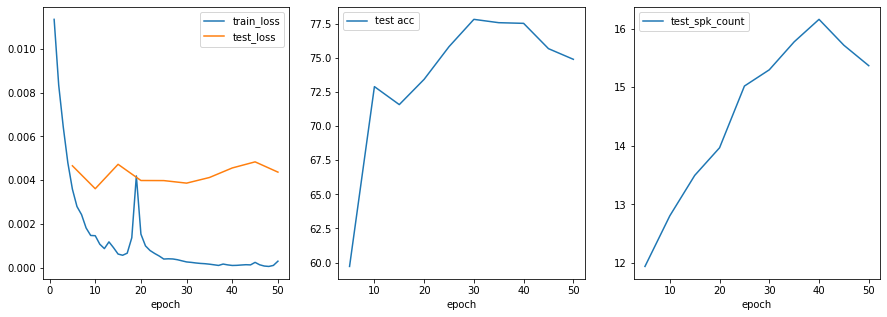

In [4]:
training_plots(snn, figsize = (15,5))

## Same scheduling as bojian + dropout 81,8%

In [5]:
num_hidden = 128
snn = RSNN_2l_ALIF(dataset, num_hidden=num_hidden, thresh=0.3, tau_m='adp', win=time_window, surr='mg', loss_fn ='mot', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-2, 50, dropout=0.2, ckpt_dir=ckpt_dir) # old configuration

RSNN_2l_ALIF(
  (criterion): CrossEntropyLoss()
  (fc_ih): Linear(in_features=700, out_features=128, bias=False)
  (fc_h1h1): Linear(in_features=128, out_features=128, bias=False)
  (fc_h1h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_h2h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_ho): Linear(in_features=128, out_features=20, bias=False)
)
Total params: 141312
Total mult-adds (M): 35.328
training shd250_RSNN_2l_ALIF_128.t7 for 50 epochs...
Epoch [1/50]
Time elasped: 39.70637130737305
Epoch [2/50]
Time elasped: 40.0564284324646
Epoch [3/50]
Time elasped: 40.31481671333313
Epoch [4/50]
Time elasped: 40.365729570388794
Epoch [5/50]
Time elasped: 40.41461801528931
Test Loss: 12.31089797282281
Avg spk_count per neuron for all 250 timesteps 15.842735290527344
Test Accuracy of the model on the test samples: 61.230
Saving max acc model
Epoch [6/50]
Time elasped: 39.470685958862305
Epoch [7/50]
Time elasped: 39.20246767997742
Epoch [8/50]
Time elasped: 39.1

shd250_RSNN_2l_ALIF_128.t7 max acc: 81.8359375


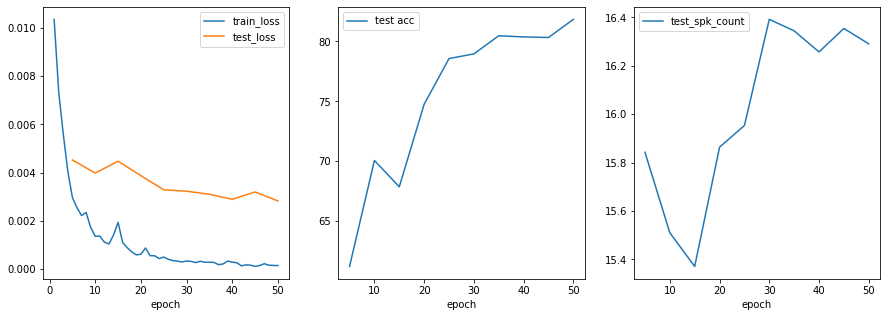

In [6]:
training_plots(snn, figsize = (15,5))

## Same scheduling as bojian + dropout + bs=300, 78%

In [2]:
dataset = 'shd'
time_window = 250
batch_size = 300 # lr=1e-4
#batch_size = 128 # lr=1e-4
DL = DatasetLoader(dataset=dataset, caching='memory', num_workers=0, batch_size=batch_size, time_window=time_window)
data = DL.get_dataloaders()
ckpt_dir = 'other-tests250'

In [8]:
num_hidden = 128
snn = RSNN_2l_ALIF(dataset, num_hidden=num_hidden, thresh=0.3, tau_m='adp', win=time_window, surr='mg', loss_fn ='mot', batch_size=batch_size, device=device)
snn.to(device)
train(snn, data, 1e-2, 50, dropout=0.2, ckpt_dir=ckpt_dir) # old configuration

RSNN_2l_ALIF(
  (criterion): CrossEntropyLoss()
  (fc_ih): Linear(in_features=700, out_features=128, bias=False)
  (fc_h1h1): Linear(in_features=128, out_features=128, bias=False)
  (fc_h1h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_h2h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_ho): Linear(in_features=128, out_features=20, bias=False)
)
Total params: 141312
Total mult-adds (M): 35.328
training shd250_RSNN_2l_ALIF_128.t7 for 50 epochs...
Epoch [1/50]
Time elasped: 77.51237440109253
Epoch [2/50]
Time elasped: 37.492785930633545
Epoch [3/50]
Time elasped: 37.02826404571533
Epoch [4/50]
Time elasped: 36.80791997909546
Epoch [5/50]
Time elasped: 37.04096460342407
Test Loss: 12.36554708874415
Avg spk_count per neuron for all 250 timesteps 18.803176879882812
Test Accuracy of the model on the test samples: 56.381
Saving max acc model
Epoch [6/50]
Time elasped: 37.42701244354248
Epoch [7/50]
Time elasped: 37.514235496520996
Epoch [8/50]
Time elasped: 37.

## Same scheduling as bojian + dropout + bs=300 + !(images>0), 78%

In [3]:
num_hidden = 128
snn = RSNN_2l_ALIF(dataset, num_hidden=num_hidden, thresh=0.3, tau_m='adp', win=time_window, surr='mg', loss_fn ='mot', batch_size=batch_size, device=device)
snn.to(device)
train(snn, data, 1e-2, 50, dropout=0.2, ckpt_dir=ckpt_dir) # old configuration

RSNN_2l_ALIF(
  (criterion): CrossEntropyLoss()
  (fc_ih): Linear(in_features=700, out_features=128, bias=False)
  (fc_h1h1): Linear(in_features=128, out_features=128, bias=False)
  (fc_h1h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_h2h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_ho): Linear(in_features=128, out_features=20, bias=False)
)
Total params: 141312
Total mult-adds (M): 35.328
training shd250_RSNN_2l_ALIF_128.t7 for 50 epochs...
Epoch [1/50]
Time elasped: 69.53284287452698
Epoch [2/50]
Time elasped: 33.53488779067993
Epoch [3/50]
Time elasped: 32.52239274978638
Epoch [4/50]
Time elasped: 32.8407506942749
Epoch [5/50]
Time elasped: 32.942301988601685
Test Loss: 10.646209040444996
Avg spk_count per neuron for all 250 timesteps 16.640750885009766
Test Accuracy of the model on the test samples: 62.000
Saving max acc model
Epoch [6/50]
Time elasped: 32.58362674713135
Epoch [7/50]
Time elasped: 32.58087372779846
Epoch [8/50]
Time elasped: 32.7

## Old configuration

In [ ]:
hidden = (64, 2, 'f')
snn = RSNN_d_d(dataset, hidden=hidden, delay =(150,3), thresh=0.3, tau_m='adp', win=time_window, surr='step',  loss_fn ='sum', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-3, 50, ckpt_dir=ckpt_dir, lr_scale = (1.0, 1.0)) # old configuration

In [ ]:
training_plots(snn, figsize = (15,5))

In [21]:
0.98**50

0.36416968008711675

In [22]:
0.95**5

0.7737809374999998